# Gather function

In [5]:
data('iris')

In [6]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [7]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [8]:
iris$id<- formatC(1:nrow(iris), width=2, flag='0')

In [9]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,id
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1,5.1,3.5,1.4,0.2,setosa,01
2,4.9,3.0,1.4,0.2,setosa,02
3,4.7,3.2,1.3,0.2,setosa,03
4,4.6,3.1,1.5,0.2,setosa,04
5,5.0,3.6,1.4,0.2,setosa,05
6,5.4,3.9,1.7,0.4,setosa,06


In [12]:
library(dplyr)
library(tidyr)

Warning message:
“package ‘tidyr’ was built under R version 3.4.4”


In [13]:
iris.gather<- gather(iris, key=part_attr, val=measure,  -Species, -id)
    

In [14]:
head(iris.gather)

,Species,id,part_attr,measure
,<fct>,<chr>,<chr>,<dbl>
1,setosa,01,Sepal.Length,5.1
2,setosa,02,Sepal.Length,4.9
3,setosa,03,Sepal.Length,4.7
4,setosa,04,Sepal.Length,4.6
5,setosa,05,Sepal.Length,5.0
6,setosa,06,Sepal.Length,5.4


In [15]:
iris.gathered.tidier <- iris.gather %>% 
    separate( col=part_attr, into=c( "Part", "Attr"), sep="\\.") 
    

In [16]:
head(iris.gathered.tidier)

,Species,id,Part,Attr,measure
,<fct>,<chr>,<chr>,<chr>,<dbl>
1,setosa,01,Sepal,Length,5.1
2,setosa,02,Sepal,Length,4.9
3,setosa,03,Sepal,Length,4.7
4,setosa,04,Sepal,Length,4.6
5,setosa,05,Sepal,Length,5.0
6,setosa,06,Sepal,Length,5.4


In [17]:
iris.gathered.tidier %>%
    group_by(Species) %>%
    sample_n(3)

Species,id,Part,Attr,measure
<fct>,<chr>,<chr>,<chr>,<dbl>
setosa,50,Petal,Width,0.2
setosa,42,Sepal,Length,4.5
setosa,28,Petal,Width,0.2
versicolor,62,Petal,Length,4.2
versicolor,91,Petal,Width,1.2
versicolor,54,Sepal,Length,5.5
virginica,150,Sepal,Length,5.9
virginica,146,Sepal,Length,6.7
virginica,123,Sepal,Width,2.8


In [25]:
iris.gathered.tidier %>%
    spread(Attr, measure)%>%slice(1:4)

Species,id,Part,Length,Width
<fct>,<chr>,<chr>,<dbl>,<dbl>
setosa,01,Petal,1.4,0.2
setosa,01,Sepal,5.1,3.5
setosa,02,Petal,1.4,0.2
setosa,02,Sepal,4.9,3.0


In [1]:
library("dplyr")
names(starwars)   


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] "name"       "height"     "mass"       "hair_color" "skin_color"
 [6] "eye_color"  "birth_year" "gender"     "homeworld"  "species"   
[11] "films"      "vehicles"   "starships"

In [3]:
head(starwars)

name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,films,vehicles,starships
<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<list>,<list>,<list>
Luke Skywalker,172,77,blond,fair,blue,19.0,male,Tatooine,Human,"Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope , The Force Awakens","Snowspeeder , Imperial Speeder Bike","X-wing , Imperial shuttle"
C-3PO,167,75,NA,gold,yellow,112.0,NA,Tatooine,Droid,"Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope",,
R2-D2,96,32,NA,"white, blue",red,33.0,NA,Naboo,Droid,"Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope , The Force Awakens",,
Darth Vader,202,136,none,white,yellow,41.9,male,Tatooine,Human,"Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope",,TIE Advanced x1
Leia Organa,150,49,brown,light,brown,19.0,female,Alderaan,Human,"Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope , The Force Awakens",Imperial Speeder Bike,
Owen Lars,178,120,"brown, grey",light,blue,52.0,male,Tatooine,Human,"Attack of the Clones, Revenge of the Sith , A New Hope",,


In [5]:
starwars[is.na(starwars)] <- 0  # Replacing NA values with 0
  starwars %>%                    # Passing the Starwars dataset to next function
  summarize( mean(mass), median(height))

mean(mass),median(height)
<dbl>,<dbl>
65.9931,178


In [7]:
starwars[is.na(starwars)] <- 0  # Replacing NA values with 0
  starwars %>%                    # Passing the Starwars dataset to next function
  group_by(species) %>%          # Grouping by species
  summarize( mean(mass), median(height))%>% head()

species,mean(mass),median(height)
<chr>,<dbl>,<dbl>
0,9.6,178
Aleena,15.0,79
Besalisk,102.0,198
Cerean,82.0,198
Chagrian,0.0,196
Clawdite,55.0,168


In [9]:
  starwars[is.na(starwars)] <- 0  # Replacing NA values with 0
  starwars %>%                    # Passing the Starwars dataset to next function
  group_by(species, gender) %>%          # Grouping by species and gender
  summarize( mean(mass), median(height))%>% head()

species,gender,mean(mass),median(height)
<chr>,<chr>,<dbl>,<dbl>
0,female,16,96
0,male,0,183
Aleena,male,15,79
Besalisk,male,102,198
Cerean,male,82,198
Chagrian,male,0,196


In [10]:
  starwars[is.na(starwars)] <- 0  # Replacing NA values with 0
  starwars %>%                    # Passing the Starwars dataset to next function
  filter(hair_color == "black" | hair_color == "brown" )  %>%   # Filtering hair color by black or brown
  summarize( mean(mass), median(height))

mean(mass),median(height)
<dbl>,<dbl>
44.62581,171


In [11]:
 starwars[is.na(starwars)] <- 0  # Replacing NA values with 0
  starwars %>%                    # Passing the Starwars dataset to next function
  filter( gender == "female" & homeworld == "Naboo" )  %>%   # Filtering by female gender and naboo homeworld
  summarize( mean(mass), median(height))

mean(mass),median(height)
<dbl>,<dbl>
15,165


In [16]:
  starwars[is.na(starwars)] <- 0  # Replacing NA values with 0
  starwars %>%                    # Passing the Starwars dataset to next function
  group_by(homeworld) %>%         # Grouping by homeworld
    summarize( height_feet = mean(height/30.48))%>% head()

homeworld,height_feet
<chr>,<dbl>
0,1.820866
Alderaan,5.785214
Aleen Minor,2.591864
Bespin,5.741470
Bestine IV,5.905512
Cato Neimoidia,6.266404


In [18]:
  starwars[is.na(starwars)] <- 0  # Replacing NA values with 0
  arrange(starwars, height, mass)%>%head()

name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,films,vehicles,starships
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<list>,<list>,<list>
Arvel Crynyd,0,0,brown,fair,brown,0,male,0,Human,Return of the Jedi,,A-wing
Finn,0,0,black,dark,dark,0,male,0,Human,The Force Awakens,,
Rey,0,0,brown,light,hazel,0,female,0,Human,The Force Awakens,,
Poe Dameron,0,0,brown,light,brown,0,male,0,Human,The Force Awakens,,T-70 X-wing fighter
BB8,0,0,none,none,black,0,none,0,Droid,The Force Awakens,,
Captain Phasma,0,0,unknown,unknown,unknown,0,female,0,0,The Force Awakens,,


In [19]:
  starwars[is.na(starwars)] <- 0  # Replacing NA values with 0
  arrange(starwars, desc(height))%>%head()

name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,films,vehicles,starships
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<list>,<list>,<list>
Yarael Poof,264,0,none,white,yellow,0,male,Quermia,Quermian,The Phantom Menace,,
Tarfful,234,136,brown,brown,blue,0,male,Kashyyyk,Wookiee,Revenge of the Sith,,
Lama Su,229,88,none,grey,black,0,male,Kamino,Kaminoan,Attack of the Clones,,
Chewbacca,228,112,brown,unknown,blue,200,male,Kashyyyk,Wookiee,"Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope , The Force Awakens",AT-ST,"Millennium Falcon, Imperial shuttle"
Roos Tarpals,224,82,none,grey,orange,0,male,Naboo,Gungan,The Phantom Menace,,
Grievous,216,159,none,"brown, white","green, yellow",0,male,Kalee,Kaleesh,Revenge of the Sith,Tsmeu-6 personal wheel bike,Belbullab-22 starfighter


In [23]:
  starwars[is.na(starwars)] <- 0  # Replacing NA values with 0
  pivot <- starwars %>%           # Saving the data in table called pivot
  group_by(species) %>%          # Grouping by species
  summarize( mass = mean(mass), height = median(height))
  arrange(pivot, desc(mass))  %>%head()

species,mass,height
<chr>,<dbl>,<dbl>
Hutt,1358,175
Kaleesh,159,216
Wookiee,124,231
Trandoshan,113,190
Besalisk,102,198
Neimodian,90,191


In [25]:
new_starwars <- mutate(starwars, age= 2019 - birth_year)
head(new_starwars)

name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,films,vehicles,starships,age
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<list>,<list>,<list>,<dbl>
Luke Skywalker,172,77,blond,fair,blue,19.0,male,Tatooine,Human,"Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope , The Force Awakens","Snowspeeder , Imperial Speeder Bike","X-wing , Imperial shuttle",2000.0
C-3PO,167,75,0,gold,yellow,112.0,0,Tatooine,Droid,"Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope",,,1907.0
R2-D2,96,32,0,"white, blue",red,33.0,0,Naboo,Droid,"Attack of the Clones , The Phantom Menace , Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope , The Force Awakens",,,1986.0
Darth Vader,202,136,none,white,yellow,41.9,male,Tatooine,Human,"Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope",,TIE Advanced x1,1977.1
Leia Organa,150,49,brown,light,brown,19.0,female,Alderaan,Human,"Revenge of the Sith , Return of the Jedi , The Empire Strikes Back, A New Hope , The Force Awakens",Imperial Speeder Bike,,2000.0
Owen Lars,178,120,"brown, grey",light,blue,52.0,male,Tatooine,Human,"Attack of the Clones, Revenge of the Sith , A New Hope",,,1967.0


In [37]:
library(mlbench)
library(caret)

Loading required package: lattice

Warning message:
“package ‘lattice’ was built under R version 3.4.4”

Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [38]:
# setup cross validation and control parameters
control <- trainControl(method="repeatedcv", number=3, repeats = 3, verbose = TRUE, search = "grid")
tuneLength <- 3

In [39]:
## Classification
data(PimaIndiansDiabetes)
# rename dataset to keep code below generic
dataset <- PimaIndiansDiabetes
dim(dataset)
sapply(dataset, class)

[1] 768   9

pregnant   glucose  pressure   triceps   insulin      mass  pedigree       age 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
 diabetes 
 "factor"

In [40]:
# Training process 
# Fit / train a Linear Regression model to  dataset
fit.xgBoostC <- caret::train(diabetes~., data=dataset, method="xgbLinear", metric="Accuracy", 
                             preProc=c("center", "scale"), trControl=control, tuneLength = tuneLength)
print(fit.xgBoostC)

+ Fold1.Rep1: lambda=0e+00, alpha=0e+00, nrounds= 50, eta=0.3 
- Fold1.Rep1: lambda=0e+00, alpha=0e+00, nrounds= 50, eta=0.3 
+ Fold1.Rep1: lambda=1e-01, alpha=0e+00, nrounds= 50, eta=0.3 
- Fold1.Rep1: lambda=1e-01, alpha=0e+00, nrounds= 50, eta=0.3 
+ Fold1.Rep1: lambda=1e-04, alpha=0e+00, nrounds= 50, eta=0.3 
- Fold1.Rep1: lambda=1e-04, alpha=0e+00, nrounds= 50, eta=0.3 
+ Fold1.Rep1: lambda=0e+00, alpha=1e-01, nrounds= 50, eta=0.3 
- Fold1.Rep1: lambda=0e+00, alpha=1e-01, nrounds= 50, eta=0.3 
+ Fold1.Rep1: lambda=1e-01, alpha=1e-01, nrounds= 50, eta=0.3 
- Fold1.Rep1: lambda=1e-01, alpha=1e-01, nrounds= 50, eta=0.3 
+ Fold1.Rep1: lambda=1e-04, alpha=1e-01, nrounds= 50, eta=0.3 
- Fold1.Rep1: lambda=1e-04, alpha=1e-01, nrounds= 50, eta=0.3 
+ Fold1.Rep1: lambda=0e+00, alpha=1e-04, nrounds= 50, eta=0.3 
- Fold1.Rep1: lambda=0e+00, alpha=1e-04, nrounds= 50, eta=0.3 
+ Fold1.Rep1: lambda=1e-01, alpha=1e-04, nrounds= 50, eta=0.3 
- Fold1.Rep1: lambda=1e-01, alpha=1e-04, nrounds= 50, e

Selecting tuning parameters
Fitting nrounds = 50, lambda = 0.1, alpha = 0, eta = 0.3 on full training set
eXtreme Gradient Boosting 

768 samples
  8 predictor
  2 classes: 'neg', 'pos' 

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (3 fold, repeated 3 times) 
Summary of sample sizes: 511, 512, 513, 512, 512, 512, ... 
Resampling results across tuning parameters:

  lambda  alpha  nrounds  Accuracy   Kappa    
  0e+00   0e+00   50      0.7443576  0.4278013
  0e+00   0e+00  100      0.7356770  0.4103497
  0e+00   0e+00  150      0.7339408  0.4058776
  0e+00   1e-04   50      0.7447916  0.4282413
  0e+00   1e-04  100      0.7361144  0.4114656
  0e+00   1e-04  150      0.7369740  0.4141634
  0e+00   1e-01   50      0.7538995  0.4490319
  0e+00   1e-01  100      0.7526127  0.4462675
  0e+00   1e-01  150      0.7530416  0.4468926
  1e-04   0e+00   50      0.7447916  0.4282413
  1e-04   0e+00  100      0.7369791  0.4140870
  1e-04   0e+00  150      0.7361076  0.41219

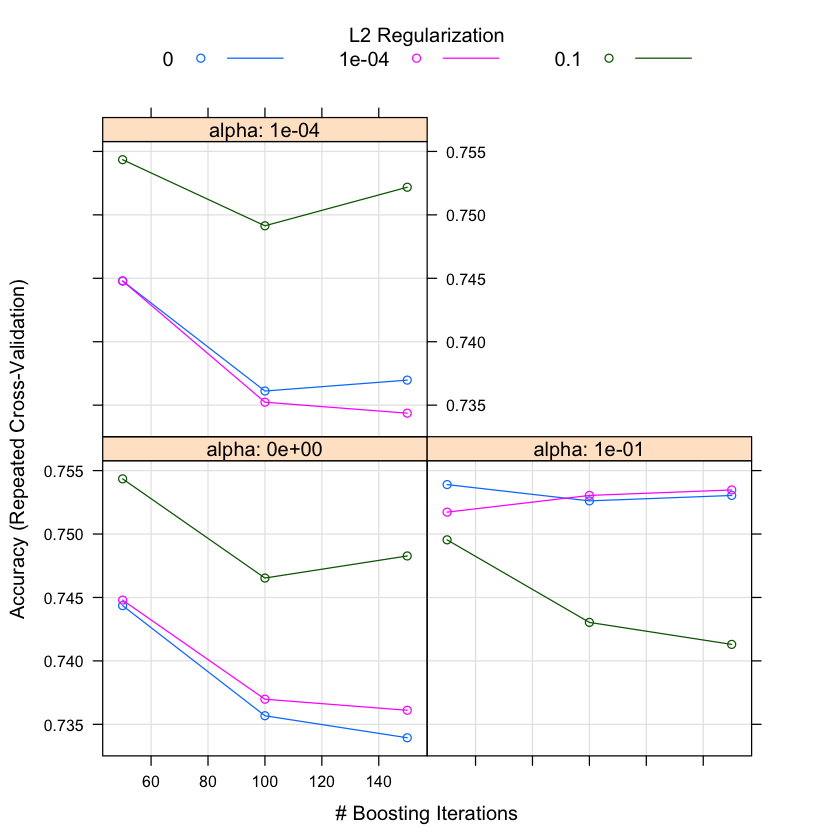

In [41]:
plot(fit.xgBoostC)


# Part II

In [43]:
#install.packages("doMC")

Warning message:
“unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'”
Warning message:
“package ‘doMC’ is not available (for R version 3.4.3)”
Warning message:
“unable to access index for repository https://cran.r-project.org/bin/macosx/el-capitan/contrib/3.4:
  cannot open URL 'https://cran.r-project.org/bin/macosx/el-capitan/contrib/3.4/PACKAGES'”


In [44]:
# Breast Cancer

# binary classification, categorical attributes

# Description: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)
# World-Class Results: http://www.is.umk.pl/projects/datasets.html#Wisconsin

# load libraries
library(mlbench)
library(caret)

# use multiple cores
# library(doMC)
# registerDoMC(cores=8)

# Load data
data(BreastCancer)

# Split out validation dataset
# create a list of 80% of the rows in the original dataset we can use for training
set.seed(7)
validation_index <- createDataPartition(BreastCancer$Class, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- BreastCancer[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- BreastCancer[validation_index,]


# data analysis

# dimensions of dataaset
dim(dataset)

# peek
head(dataset, n=20)

# types
sapply(dataset, class)

# Tune kNN

[1] 560  11

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
,<chr>,<ord>,<ord>,<ord>,<ord>,<ord>,<fct>,<fct>,<fct>,<fct>,<fct>
2,1002945,5,4,4,5,7,10,3,2,1,benign
4,1016277,6,8,8,1,3,4,3,7,1,benign
5,1017023,4,1,1,3,2,1,3,1,1,benign
6,1017122,8,10,10,8,7,10,9,7,1,malignant
7,1018099,1,1,1,1,2,10,3,1,1,benign
9,1033078,2,1,1,1,2,1,1,1,5,benign
10,1033078,4,2,1,1,2,1,2,1,1,benign
11,1035283,1,1,1,1,1,1,3,1,1,benign
12,1036172,2,1,1,1,2,1,2,1,1,benign


$Id
[1] "character"

$Cl.thickness
[1] "ordered" "factor" 

$Cell.size
[1] "ordered" "factor" 

$Cell.shape
[1] "ordered" "factor" 

$Marg.adhesion
[1] "ordered" "factor" 

$Epith.c.size
[1] "ordered" "factor" 

$Bare.nuclei
[1] "factor"

$Bl.cromatin
[1] "factor"

$Normal.nucleoli
[1] "factor"

$Mitoses
[1] "factor"

$Class
[1] "factor"

In [45]:

# Remove redundant variable Id
dataset <- dataset[,-1]
# convert input values to numeric
for(i in 1:9) {
    dataset[,i] <- as.numeric(as.character(dataset[,i]))
}

# summary
summary(dataset)

  Cl.thickness      Cell.size        Cell.shape     Marg.adhesion   
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 1.000  
 Median : 4.000   Median : 1.000   Median : 2.000   Median : 1.000  
 Mean   : 4.384   Mean   : 3.116   Mean   : 3.198   Mean   : 2.875  
 3rd Qu.: 6.000   3rd Qu.: 5.000   3rd Qu.: 5.000   3rd Qu.: 4.000  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.000  
                                                                    
  Epith.c.size     Bare.nuclei      Bl.cromatin     Normal.nucleoli 
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 2.000   1st Qu.: 1.000  
 Median : 2.000   Median : 1.000   Median : 3.000   Median : 1.000  
 Mean   : 3.232   Mean   : 3.468   Mean   : 3.405   Mean   : 2.877  
 3rd Qu.: 4.000   3rd Qu.: 5.000   3rd Qu.: 4.250   3rd Qu.: 4.000  
 Max.   :10.000   Max.   :10.000  

,freq,percentage
benign,367,65.53571
malignant,193,34.46429


,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
Cl.thickness,1.0000000,0.6200884,0.6302917,0.4741733,0.5089557,0.5600770,0.5290733,0.5143933,0.3426018
Cell.size,0.6200884,1.0000000,0.9011340,0.7141150,0.7404824,0.6687226,0.7502700,0.7072182,0.4506532
Cell.shape,0.6302917,0.9011340,1.0000000,0.6846206,0.7043423,0.6896724,0.7276114,0.7127155,0.4345125
Marg.adhesion,0.4741733,0.7141150,0.6846206,1.0000000,0.5860660,0.6660165,0.6660533,0.6031036,0.4314910
Epith.c.size,0.5089557,0.7404824,0.7043423,0.5860660,1.0000000,0.5568406,0.6102032,0.6433364,0.4775271
Bare.nuclei,0.5600770,0.6687226,0.6896724,0.6660165,0.5568406,1.0000000,0.6668483,0.5795794,0.3539473
Bl.cromatin,0.5290733,0.7502700,0.7276114,0.6660533,0.6102032,0.6668483,1.0000000,0.6838547,0.3545122
Normal.nucleoli,0.5143933,0.7072182,0.7127155,0.6031036,0.6433364,0.5795794,0.6838547,1.0000000,0.4084127
Mitoses,0.3426018,0.4506532,0.4345125,0.4314910,0.4775271,0.3539473,0.3545122,0.4084127,1.0000000


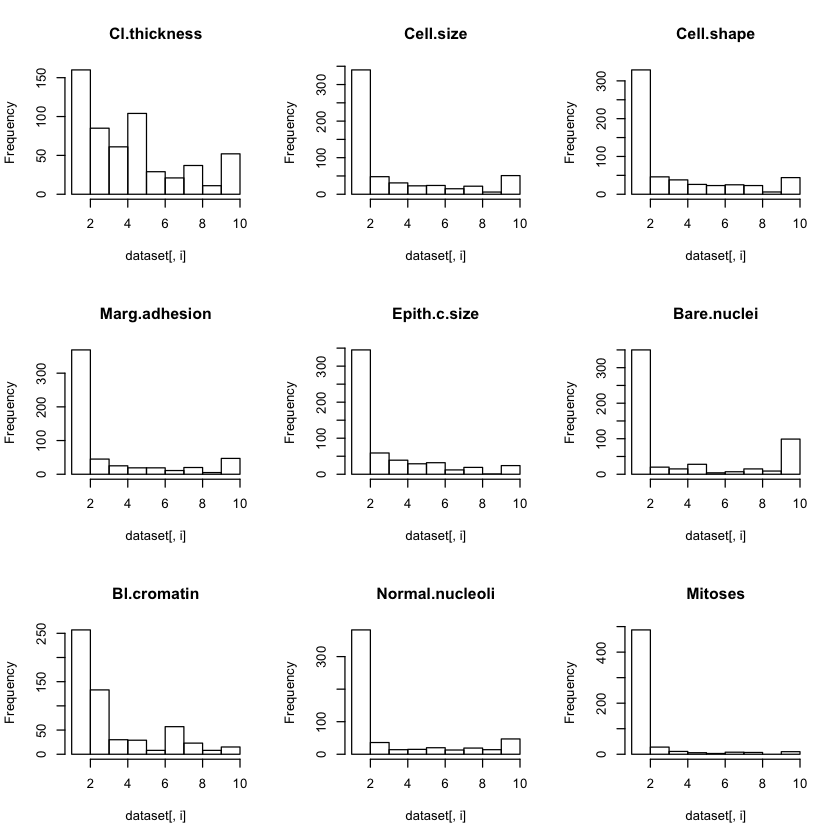

In [46]:
# class distribution
cbind(freq=table(dataset$Class), percentage=prop.table(table(dataset$Class))*100)

# summarize correlations between input variables
complete_cases <- complete.cases(dataset)
cor(dataset[complete_cases,1:9])

# histograms each attribute
par(mfrow=c(3,3))
for(i in 1:9) {
    hist(dataset[,i], main=names(dataset)[i])
}

In [ ]:

# density plot for each attribute
par(mfrow=c(3,3))
complete_cases <- complete.cases(dataset)
for(i in 1:9) {
    plot(density(dataset[complete_cases,i]), main=names(dataset)[i])
}

# boxplots for each attribute
par(mfrow=c(3,3))
for(i in 1:9) {
    boxplot(dataset[,i], main=names(dataset)[i])
}

# scatterplot matrix
jittered_x <- sapply(dataset[,1:9], jitter)
pairs(jittered_x, names(dataset[,1:9]), col=dataset$Class)

# bar plots of each variable by class
par(mfrow=c(3,3))
for(i in 1:9) {
    barplot(table(dataset$Class,dataset[,i]), main=names(dataset)[i], legend.text=unique(dataset$Class))
}



# Evaluate Algorithms

# 10-fold cross validation with 3 repeats
control <- trainControl(method="repeatedcv", number=10, repeats=3)
metric <- "Accuracy"

# LG
set.seed(7)
fit.glm <- train(Class~., data=dataset, method="glm", metric=metric, trControl=control, na.action=na.omit)


In [ ]:

# LDA
set.seed(7)
fit.lda <- train(Class~., data=dataset, method="lda", metric=metric, trControl=control, na.action=na.omit)


In [ ]:

# GLMNET
set.seed(7)
fit.glmnet <- train(Class~., data=dataset, method="glmnet", metric=metric, trControl=control, na.action=na.omit)


In [ ]:

# KNN
set.seed(7)
fit.knn <- train(Class~., data=dataset, method="knn", metric=metric, trControl=control, na.action=na.omit)


In [ ]:

# CART
set.seed(7)
fit.cart <- train(Class~., data=dataset, method="rpart", metric=metric, trControl=control, na.action=na.omit)


In [ ]:

# Naive Bayes
set.seed(7)
fit.nb <- train(Class~., data=dataset, method="nb", metric=metric, trControl=control, na.action=na.omit)


In [ ]:

# SVM
set.seed(7)
fit.svm <- train(Class~., data=dataset, method="svmRadial", metric=metric, trControl=control, na.action=na.omit)


In [ ]:

# Compare algorithms
results <- resamples(list(LG=fit.glm, LDA=fit.lda, GLMNET=fit.glmnet, KNN=fit.knn, CART=fit.cart, NB=fit.nb, SVM=fit.svm))
summary(results)
dotplot(results)



In [ ]:

# Evaluate Algorithms Transform

# 10-fold cross validation with 3 repeats
control <- trainControl(method="repeatedcv", number=10, repeats=3)
metric <- "Accuracy"


In [ ]:

# LG
set.seed(7)
fit.glm <- train(Class~., data=dataset, method="glm", metric=metric, preProc=c("BoxCox"), trControl=control, na.action=na.omit)


In [ ]:

# LDA
set.seed(7)
fit.lda <- train(Class~., data=dataset, method="lda", metric=metric, preProc=c("BoxCox"), trControl=control, na.action=na.omit)


In [ ]:

# GLMNET
set.seed(7)
fit.glmnet <- train(Class~., data=dataset, method="glmnet", metric=metric, preProc=c("BoxCox"), trControl=control, na.action=na.omit)


In [ ]:

# KNN
set.seed(7)
fit.knn <- train(Class~., data=dataset, method="knn", metric=metric, preProc=c("BoxCox"), trControl=control, na.action=na.omit)


In [ ]:

# CART
set.seed(7)
fit.cart <- train(Class~., data=dataset, method="rpart", metric=metric, preProc=c("BoxCox"), trControl=control, na.action=na.omit)


In [ ]:

# Naive Bayes
set.seed(7)
fit.nb <- train(Class~., data=dataset, method="nb", metric=metric, preProc=c("BoxCox"), trControl=control, na.action=na.omit)


In [ ]:

# SVM
set.seed(7)
fit.svm <- train(Class~., data=dataset, method="svmRadial", metric=metric, preProc=c("BoxCox"), trControl=control, na.action=na.omit)


In [ ]:

# Compare algorithms
transform_results <- resamples(list(LG=fit.glm, LDA=fit.lda, GLMNET=fit.glmnet, KNN=fit.knn, CART=fit.cart, NB=fit.nb, SVM=fit.svm))
summary(transform_results)
dotplot(transform_results)



In [ ]:


# Tune SVM

# 10-fold cross validation with 3 repeats
control <- trainControl(method="repeatedcv", number=10, repeats=3)
metric <- "Accuracy"
set.seed(7)
grid <- expand.grid(.sigma=c(0.025, 0.05, 0.1, 0.15), .C=seq(1, 10, by=1))
fit.svm <- train(Class~., data=dataset, method="svmRadial", metric=metric, tuneGrid=grid, preProc=c("BoxCox"), trControl=control, na.action=na.omit)
print(fit.svm)
plot(fit.svm)